In [1]:
import pandas as pd
import numpy as np
import re
import math


df_sample_rec = pd.read_csv('recommmendation_sample.csv')

In [2]:
df_sample_rec.head()

,userid,movieid,rating,rank
0,822109,1798,4,1
1,822109,4883,4,2
2,822109,16244,4,3
3,822109,1810,4,1
4,822109,11679,4,2


In [3]:
# Create empty graph
import networkx as nx
import matplotlib.pyplot as plt
g = nx.Graph()

In [4]:
# Add edges and edge attributes
for i, elrow in df_sample_rec.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
print(elrow[0]) # node1
print(elrow[1]) # node2 
print(elrow[2:].to_dict()) # edge attribute dict

822109
8181
{'rank': 2, 'rating': 4}


In [5]:
# Preview first 5 edges
g.edges(data=True)[0:5]

[(2612, 822109, {'rank': 1, 'rating': 4}),
 (10419, 822109, {'rank': 2, 'rating': 4}),
 (262, 822109, {'rank': 2, 'rating': 4}),
 (10505, 822109, {'rank': 2, 'rating': 4}),
 (15818, 822109, {'rank': 3, 'rating': 4})]

In [6]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))
numNodes = g.number_of_nodes()

# of edges: 29
# of nodes: 30


In [7]:
for (idx, row) in df_sample_rec.iterrows():
    nodeId = row.loc['userid']
    g.add_node(nodeId,{'color':1})
    nodeId = row.loc['movieid'] 
    #Why not adding colr?????
    g.add_node(nodeId,{'color':2,'movieid':row.loc['movieid']})

    
for (idx, row) in df_sample_rec.iterrows():
    g.add_edge(row.loc['userid'],row.loc['movieid'],weight=row.loc['rank'])

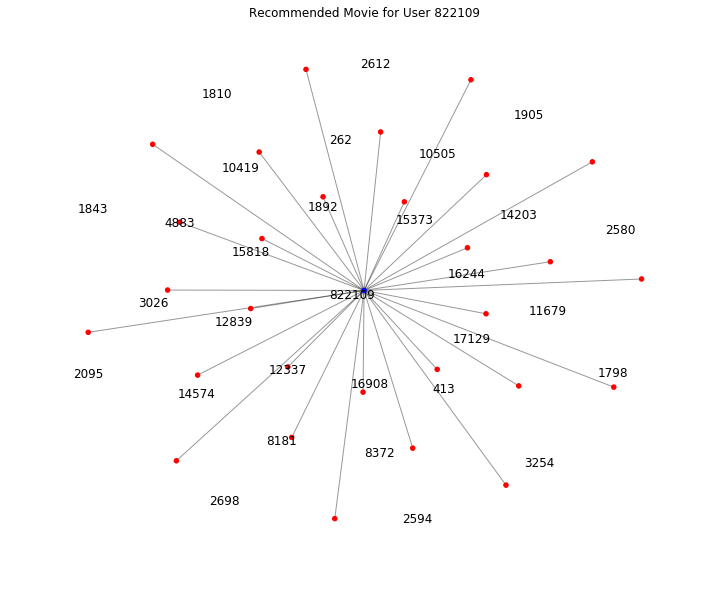

In [35]:
plt.figure(figsize=(12, 10))
#pos = nx.random_layout(g)
pos = nx.spring_layout(g)
#nx.draw(g,pos)

node_color = []
for node in g.nodes(data=True):
    # User: Node blue, Movie recommended: Node rouge
    if (node[1]['color'] == 1):
        node_color.append('blue')
    else:
         node_color.append('red')
nx.draw_networkx_nodes(g, pos,node_size=20, node_color=node_color)
nx.draw_networkx_edges(g,pos, alpha =0.4)

#Add labels to visualization
labels={}
labels = nx.draw_networkx_labels(g,pos=nx.spring_layout(g))
labels = list(labels.keys())

#Distance between user and movies allow to visualize the rank of each recommendation  
#edge_labels = nx.get_edge_attributes(g,'rank')
#edges = {}
#edges = nx.draw_networkx_edges(g, pos=nx.spring_layout(g))
#edges = list(edges.keys())

#nx.draw_networkx_edge_labels(g, pos, labels = edge_labels)
plt.axis('off')
plt.title('Recommended Movie for User 822109')
plt.show()